# Requirements

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

## Obesity Analysis


# Dataset Description

## Attributes

- id: represents a unique identifier for each participant or record in the dataset.
- Gender: Represents the gender of the individual.
- Age: Indicates the age of the individual.
- Height - Represents the height of the individual.
- Weight: Represents the weight of the individual.
- FCVC Frequency of Consumption of Vegetables
- NCP - Number of Main Meals per Day
- SMOKE - Indicates whether the individual smokes
- CH2O - Consumption of Water
- TUE - Time Using Electronic Devices
- MTRANS - Mode of Transportation
- NObeyesdad - Nutritional Obesity Status, obesity class

### Target variable
- FAF Frequency of Physical Activity

# Read the dataset

In [6]:
# Write your code here. Add as many boxes as you need.\
data = pd.read_csv('obesity.csv')
data.head()

,Unnamed: 0,id,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,0,0.0,Male,24.443011,1.699998,81.669950,2.0,2.983297,no,2.763573,0.000000,0.976473,Public_Transportation,NaN
1,1,1.0,Female,18.000000,1.560000,57.000000,2.0,3.000000,no,NaN,NaN,1.000000,Automobile,Normal_Weight
2,2,2.0,Female,18.000000,NaN,50.165754,NaN,1.411685,no,NaN,0.866045,NaN,Public_Transportation,Insufficient_Weight
3,3,3.0,NaN,20.952737,1.710730,131.274851,3.0,3.000000,no,1.674061,1.467863,0.780199,Public_Transportation,NaN
4,4,NaN,Male,31.641081,1.914186,NaN,NaN,1.971472,no,NaN,1.967973,0.931721,Public_Transportation,Overweight_Level_II


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20758 non-null  int64  
 1   id          16618 non-null  float64
 2   Gender      16634 non-null  object 
 3   Age         16608 non-null  float64
 4   Height      16667 non-null  float64
 5   Weight      16477 non-null  float64
 6   FCVC        16641 non-null  float64
 7   NCP         16697 non-null  float64
 8   SMOKE       16648 non-null  object 
 9   CH2O        16597 non-null  float64
 10  FAF         16619 non-null  float64
 11  TUE         16611 non-null  float64
 12  MTRANS      16600 non-null  object 
 13  NObeyesdad  16625 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 2.2+ MB


Explore the dataset using visualizations of your choice.

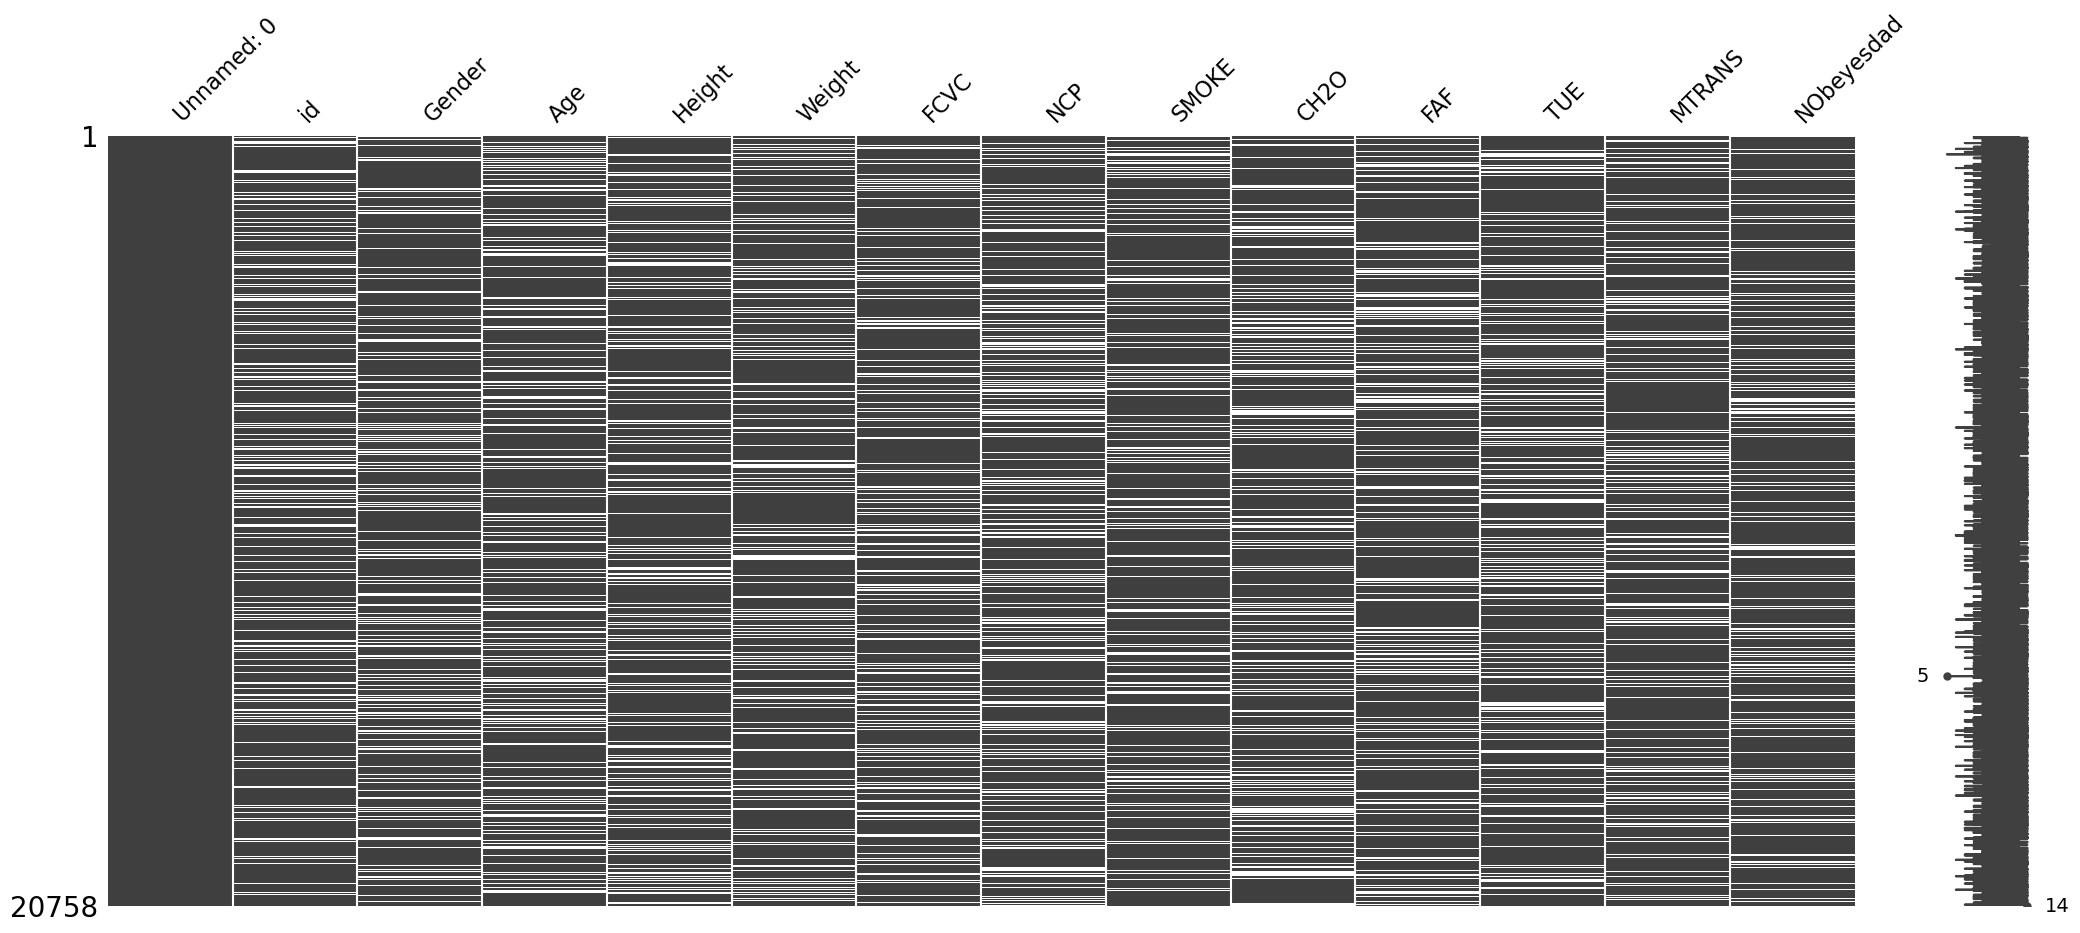

In [9]:
# Write your code here. Add as many boxes as you need.
msno.matrix(data)
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [11]:
# Write your code here. Add as many boxes as you need.
data.isnull().mean()*100

Unnamed: 0     0.000000
id            19.944118
Gender        19.867039
Age           19.992292
Height        19.708064
Weight        20.623374
FCVC          19.833317
NCP           19.563542
SMOKE         19.799595
CH2O          20.045284
FAF           19.939301
TUE           19.977840
MTRANS        20.030831
NObeyesdad    19.910396
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

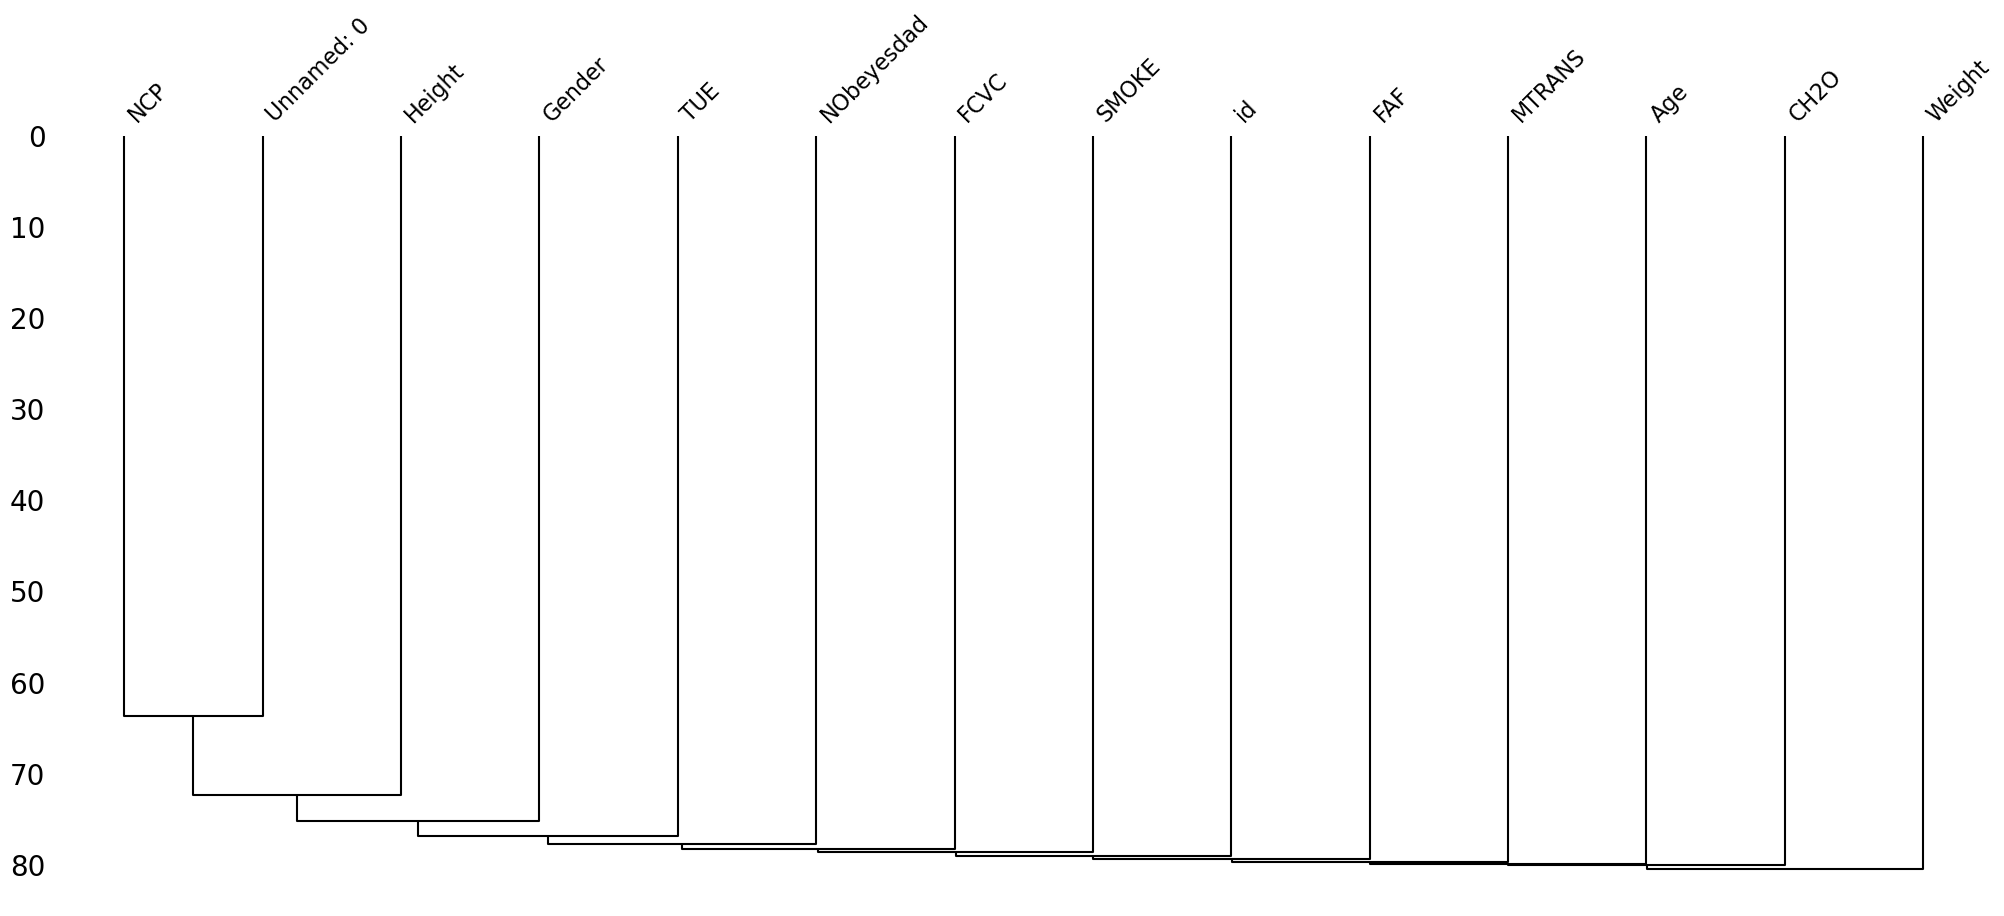

In [13]:
# Write your code here. Add as many boxes as you need.
msno.dendrogram(data)
plt.show()

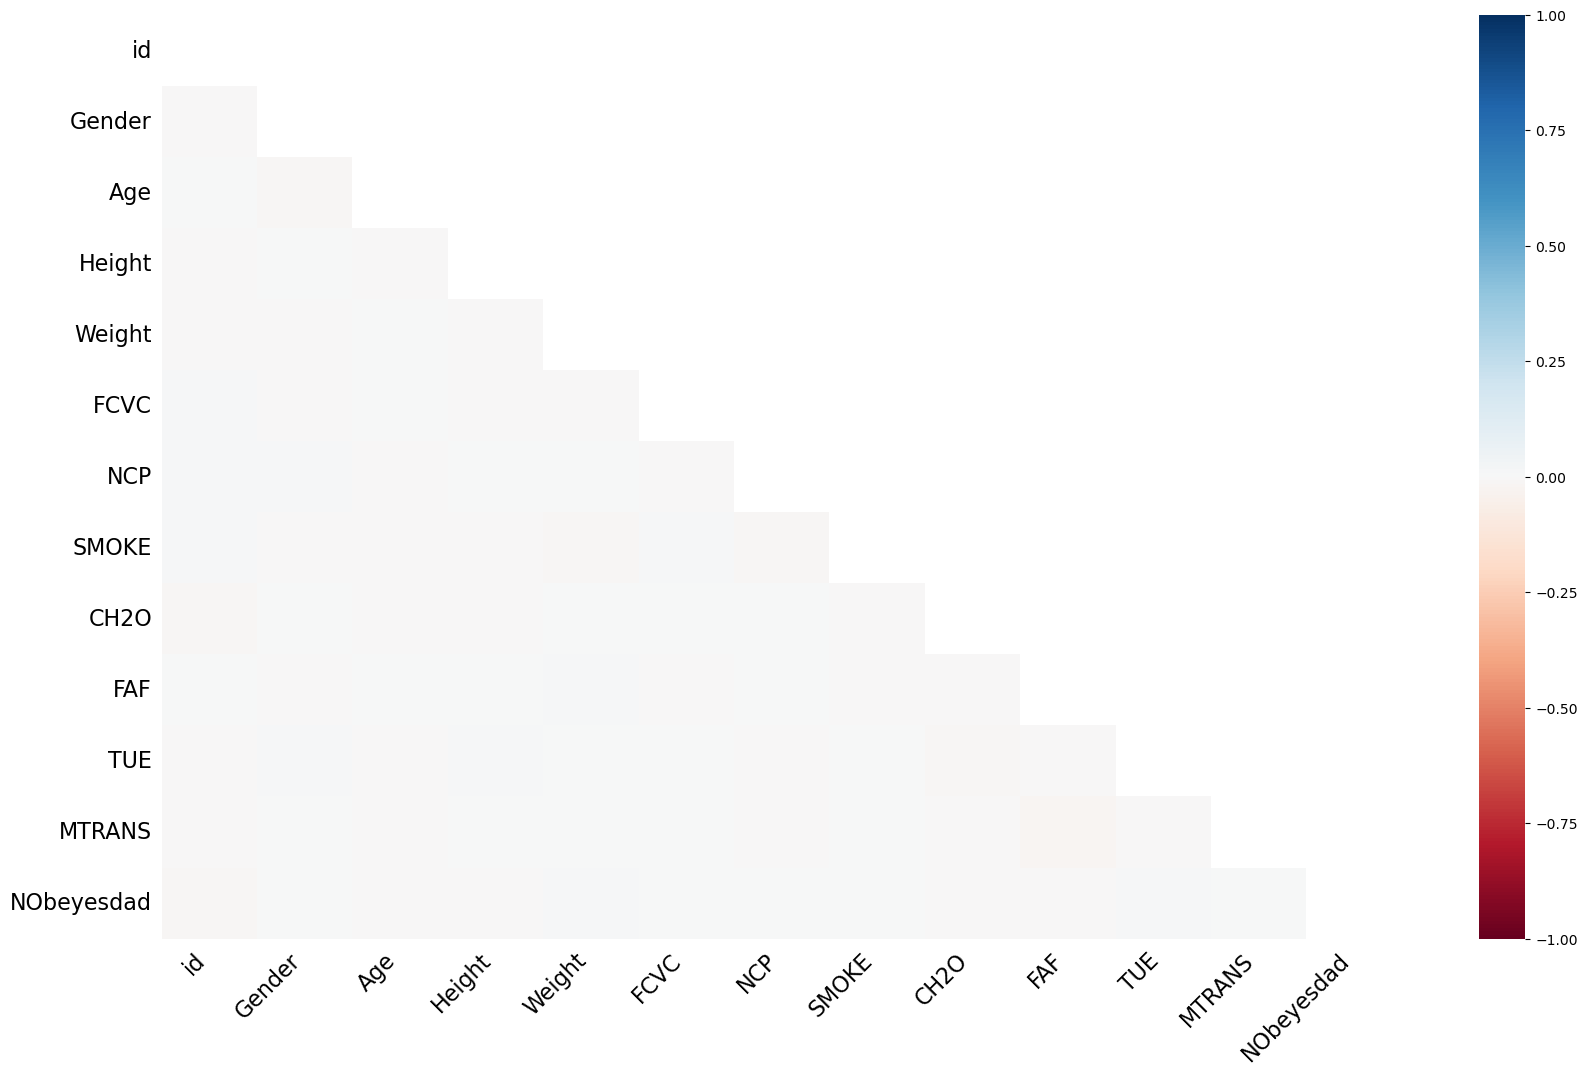

In [14]:
msno.heatmap(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [16]:
from scipy import stats

def handle_outliers(df,cols):
    for col in cols:
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        df[col] = df[col].where(z_scores < 3, df[col].median())
    return df

In [17]:
# Write your code here. Add as many boxes as you need.
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
data[num_cols] = handle_outliers(data[num_cols],num_cols)
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

cat_cols = ['Gender', 'SMOKE', 'MTRANS', 'NObeyesdad']
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


C:\Users\Beqir\AppData\Local\Temp\ipykernel_17500\410699658.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].where(z_scores < 3, df[col].median())
C:\Users\Beqir\AppData\Local\Temp\ipykernel_17500\410699658.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].where(z_scores < 3, df[col].median())
C:\Users\Beqir\AppData\Local\Temp\ipykernel_17500\410699658.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [18]:
data.isnull().sum()

Unnamed: 0       0
id            4140
Gender           0
Age              0
Height           0
Weight           0
FCVC             0
NCP              0
SMOKE            0
CH2O             0
FAF              0
TUE              0
MTRANS           0
NObeyesdad       0
dtype: int64

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [21]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['MTRANS'] = le.fit_transform(data['MTRANS'])
data['SMOKE'] = le.fit_transform(data['SMOKE'])
data['NObeyesdad'] = le.fit_transform(data['NObeyesdad'])

## Hyper-parameter optimization

Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [24]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

In [25]:
X = data.drop(['id','Unnamed: 0', 'FAF'], axis=1)
y = data['FAF']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = XGBRegressor()


param_grid = {
    'n_estimators': [100, 200,300],
    'learning_rate': [0.01, 0.05,0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs = -1, verbose =1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}


In [27]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("R2:",r2_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

R2: 0.24986194565855047
MSE: 0.4162530889852661
MAE: 0.48428408599736295


# Cross-validation evaluation

Perform leave-one out cross validation on the entire dataset, with an untrained model with the chosen hyper-parameters from the previous step.

In [30]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=10)

mse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = XGBRegressor(n_jobs=-1,**grid_search.best_params_)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

print(f"K Average mse_scores: {np.mean(mse_scores)}")

K Average mse_scores: 0.4107267804533406


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [32]:
# Write your code here. Add as many boxes as you need.
print("R2:",r2_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

R2: 0.2684897548553037
MSE: 0.3987678251216412
MAE: 0.47802522319481455
